In [1]:
from netCDF4 import Dataset  # http://code.google.com/p/netcdf4-python/
import os
####################you will need to change some paths here!#####################
#list of input files
#output files
#filename_out_nc='F:/data/cruise_data/saildrone/baja-2018/daily_files/sd-1002/data_so_far.nc'
#filename_out_kml='F:/data/cruise_data/saildrone/baja-2018/daily_files/sd-1002/data_so_far.kml'
filename_ccmp='f:/data/mmd/mmd06c_post_processed/MMD6c_drifter_yearly_extract_2010_ccmp2.np'
fname_mmdb='f:/data/mmd/mmd06c_post_processed/MMD6c_drifter_yearly_extract_2010_pos.nc';
fname_mmdb2='f:/data/mmd/mmd06c_post_processed/MMD6c_drifter_yearly_extract_2010_dtime.nc';
fname_mmdb3='f:/data/mmd/mmd06c_post_processed/MMD6c_drifter_yearly_extract_2010_wnd.nc';
dir_ccmp='F:/data/sat_data/ccmp/v02.0/Y'
#################################################################################
import datetime as dt
import xarray as xr
from datetime import datetime
import pandas as pd
import matplotlib as mpl
#import openpyxl
#from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import math
#from math import cos, radians

In [2]:
date_1993 = dt.datetime(1993,1,1,0,0,0) # start date is 11/17/1958
dx=0.25
dy=0.25
dx_offset = -179.875
dy_offset = -78.3750
with xr.open_dataset(fname_mmdb2) as dsx:
    drifter_dysince = dsx.time.T
with xr.open_dataset(fname_mmdb) as dsx:
    lats_amsr = dsx.lat.T
    lons_amsr = dsx.lon.T  #lons goes from 0 to 360
    amsr_dysince = dsx.time.T
with xr.open_dataset(fname_mmdb3) as dsx:
    nwp_uwnd = dsx.uwnd
    nwp_vwnd = dsx.vwnd
    
#amsr_date64=dsx.time[:,0].T.values
#print(amsr_date64[0:2])
#amsr_date=pd.to_datetime(amsr_date64, unit='ns')
dims=lats_amsr.shape
tdim=dims[0]
print(tdim)

2486540


In [3]:
#print(amsr_date64)
#print(amsr_date.year)

In [4]:
#dsx = xr.open_dataset(fname_mmdb,decode_times=True)


In [5]:
#amsr_date_array=[0]*tdim
#for i in range(0,tdim):
#    amsr_date_array[i]=date_1993+dt.timedelta(seconds=float(amsr_dysince[i].values))  #create new time array that can be queried for year etc

In [6]:
#amsr_date_array2=[0]*tdim
#[amsr_date_array2[i]=date_1993 + dt.timedelta(seconds=float(amsr_dysince[i].values)) for i in range(0,1000)]

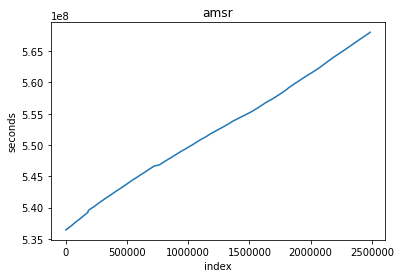

In [7]:
plt.plot(amsr_dysince);
plt.title('amsr');
plt.xlabel('index');
plt.ylabel('seconds');

In [27]:
idysv=0
istart=0
col_wndu=[0]*tdim
col_wndv=[0]*tdim
for i in range(0,tdim):
    amsr_date=date_1993+dt.timedelta(seconds=float(amsr_dysince[i].values))  #create new time array that can be queried for year etc
    #print(i,amsr_date,idysv)
    if istart==0: #initialize data
        for incr in range(-1,2):
            amsr_date2=amsr_date+dt.timedelta(days=float(incr))  #create new time array that can be queried for year etc
            syr=str(amsr_date2.year).zfill(4)
            smon=str(amsr_date2.month).zfill(2)
            sdym=str(amsr_date2.day).zfill(2)
            sjdy=str(amsr_date2.timetuple().tm_yday).zfill(3)
            fname_tem='/CCMP_Wind_Analysis_' + syr + smon + sdym + '_V02.0_L3.0_RSS.nc'
            ccmp_filename = dir_ccmp + syr + '/M' + smon + fname_tem      
            print(ccmp_filename)
            nc_fid = Dataset(ccmp_filename, 'r')
            wndu = nc_fid.variables['uwnd'][:]
 #           wndu = np.append(tem[:,720:],tem[:,:720], axis=1)
            wndv = nc_fid.variables['vwnd'][:]
           # wndv = np.append(tem[:,720:],tem[:,:720], axis=1)               
            mlat_ccmp = nc_fid.variables['latitude'][:]
            mlon_ccmp = nc_fid.variables['longitude'][:]
            #print(min(mlon_ccmp),max(mlon_ccmp))
           # mlon_ccmp = np.append(tem[720:],tem[:720], axis=0)               
           # mlon_ccmp = ((mlon_ccmp - 180) % 360) - 180  #make -180 to 180 rather than 0 360
            t=nc_fid.variables['time'][:] #units: hours since 1987-01-01 00:00:00
            time_ccmp=[0]*4
            for itt in range(0,4):
                time_ccmp[itt]=dt.datetime(1987,1,1,0,0,0)+dt.timedelta(hours=t[itt])
            nc_fid.close()
            if incr==-1:
                wndu2=wndu
                wndv2=wndv
                time_ccmp2=time_ccmp
            else:
                wndu2 =  np.append(wndu2,wndu, axis=0)
                wndv2 =  np.append(wndv2,wndv, axis=0)
                time_ccmp2 = np.append(time_ccmp2,time_ccmp, axis = 0)
            idysv=amsr_date.day
            istart=1
    if amsr_date.day!=idysv:
        #print('read in new data',amsr_date.day,idysv)
        amsr_date2=amsr_date+dt.timedelta(days=float(1))  #create new time array that can be queried for year etc
        syr=str(amsr_date2.year).zfill(4)
        smon=str(amsr_date2.month).zfill(2)
        sdym=str(amsr_date2.day).zfill(2)
        sjdy=str(amsr_date2.timetuple().tm_yday).zfill(3)
        fname_tem='/CCMP_Wind_Analysis_' + syr + smon + sdym + '_V02.0_L3.0_RSS.nc'
        ccmp_filename = dir_ccmp + syr + '/M' + smon + fname_tem      
        print(ccmp_filename)
        nc_fid = Dataset(ccmp_filename, 'r')
        wndu = nc_fid.variables['uwnd'][:]
        #wndu = np.append(tem[:,720:],tem[:,:720], axis=1)               
        wndv = nc_fid.variables['vwnd'][:]
        #wndv = np.append(tem[:,720:],tem[:,:720], axis=1)               
        mlat_ccmp = nc_fid.variables['latitude'][:]
        mlon_ccmp = nc_fid.variables['longitude'][:]
        #mlon_ccmp = np.append(tem[720:],tem[:720], axis=0)               
        #mlon_ccmp = ((mlon_ccmp - 180) % 360) - 180  #make -180 to 180 rather than 0 360
        t=nc_fid.variables['time'][:] #units: hours since 1987-01-01 00:00:00
        time_ccmp=[0]*4
        for itt in range(0,4):
            time_ccmp[itt]=dt.datetime(1987,1,1,0,0,0)+dt.timedelta(hours=t[itt])
        nc_fid.close()
        idysv=amsr_date.day
        wndu2[0:8,:,:]=wndu2[4:12,:,:]
        wndv2[0:8,:,:]=wndv2[4:12,:,:]
        time_ccmp2[0:8]=time_ccmp2[4:12]
        wndu2[8:12,:,:]=wndu[:]
        wndv2[8:12,:,:]=wndv[:]
        time_ccmp2[8:12]=time_ccmp[:]
    alat=lats_amsr[i]
    alon=lons_amsr[i]
    if alon<0:
        alon=alon+360
    latli = np.argmin( np.abs( mlat_ccmp - alat ) )
    lonli = np.argmin( np.abs( mlon_ccmp - alon ) )
    timei = np.argmin( np.abs( time_ccmp2 - amsr_date ) )
    dttime=abs(time_ccmp2[timei] - amsr_date)
    f2=dttime.seconds/(6.*60*60)
    f1=abs(f2-1.)
    if time_ccmp2[timei]<amsr_date:
        timej=timei+1
    if time_ccmp2[timei]>=amsr_date:
        timej=timei-1
    #print(f1,f2,timei,timej)
    #print(latli,mlat_ccmp[latli],alat.data)    
    #print(lonli,mlon_ccmp[lonli],alon.data)    
    #print(time_ccmp2[timei],amsr_date,time_ccmp2[timej])
    #print(f1,f2)
    tem=f1*wndu2[timei,latli,lonli]+f2*wndu2[timej,latli,lonli]
    col_wndu[i]=tem
    col_wndv[i]=f1*wndv2[timei,latli,lonli]+f2*wndv2[timej,latli,lonli]
    #print(alat.data,alon.data,amsr_date)
    #print('n',col_wndu[i],col_wndv[i])
    #print('a',nwp_uwnd[0,i].data,nwp_vwnd[0,i].data)
    #print('a',nwp_uwnd[0,i].data,wndu2[timei,latli,lonli],wndu2[timej,latli,lonli])
    #print('a',nwp_vwnd[0,i].data,wndv2[timei,latli,lonli],wndv2[timej,latli,lonli])
    #print('n',f1,f2)
    #print('n',f1*wndu2[timei,latli,lonli],f2*wndu2[timej,latli,lonli])
    #print('n',f1*wndu2[timei,latli,lonli]+f2*wndu2[timej,latli,lonli])
    #print('n',tem)
    if 50000*int(i/50000)==i:
        np.savez(filename_ccmp, name1=col_wndu, name2=col_wndv)
        ilenu=len(col_wndu)
        filename_ccmp_nc='f:/data/mmd/mmd06c_post_processed/MMD6c_drifter_yearly_extract_2010_ccmp.nc'
        fnc = Dataset(filename_ccmp_nc,'w', format='NETCDF4') 
        fnc.createDimension('t', ilenu)
        u_netcdf = fnc.createVariable('wndu', 'f4', ('t'))
        v_netcdf = fnc.createVariable('wndv', 'f4', ('t'))
        u_netcdf[:] = col_wndu
        v_netcdf[:] = col_wndv
        fnc.close()
        print(i,'output np.save')
                


F:/data/sat_data/ccmp/v02.0/Y2009/M12/CCMP_Wind_Analysis_20091230_V02.0_L3.0_RSS.nc
F:/data/sat_data/ccmp/v02.0/Y2009/M12/CCMP_Wind_Analysis_20091231_V02.0_L3.0_RSS.nc
F:/data/sat_data/ccmp/v02.0/Y2010/M01/CCMP_Wind_Analysis_20100101_V02.0_L3.0_RSS.nc
0 output np.save
F:/data/sat_data/ccmp/v02.0/Y2010/M01/CCMP_Wind_Analysis_20100102_V02.0_L3.0_RSS.nc


KeyboardInterrupt: 

In [18]:
print(latli,mlat_ccmp[latli],alat.data) #,alat)
print(wndv2[timei,latli,lonli])

455 35.375 [34.65473175]
0.94554883


In [16]:

print(nwp_uwnd[0,i].data)
print(wndv2.shape)

-7.8107781410217285
(12, 628, 1440)


2486540

AttributeError: 'list' object has no attribute 'shape'